In [2]:
import os,sys
sys.path.append('../')
import camb
import hmvec as hm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create model
zs = np.linspace(0.,3.,20)
ms = np.geomspace(2e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

In [4]:
# Get Power Spectrum off of preset NFW profile
pmm_1h = hcos.get_power_1halo(name="nfw")
pmm_2h = hcos.get_power_2halo(name="nfw")

In [5]:
# Create new profile
hcos.add_battaglia_profile("electron",family="AGN",xmax=20,nxs=5000)

/Volumes/Samsung_T5/Mac/Research/hmvec/Notebooks/../hmvec/fft.py:90: RuntimeWarning: invalid value encountered in true_divide
  uk = ukts/kts[None,None,:]/mnorm[...,None]


In [6]:
# Get Power Spectrum off of new profile
pee_1h = hcos.get_power_1halo(name="electron")
pee_2h = hcos.get_power_2halo(name="electron")

In [7]:
# Calculate cross spectrum between profiles
pme_1h = hcos.get_power_1halo("nfw","electron")
pme_2h = hcos.get_power_2halo("nfw","electron")

In [8]:
# Add Halo Occupancy Distribution
hcos.add_hod(name="g",mthresh=10**10.5+zs*0.)

/Volumes/Samsung_T5/Mac/Research/hmvec/Notebooks/../hmvec/hmvec.py:737: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


In [9]:
hcos.uk_profiles['nfw'].shape

(20, 200, 1001)

In [10]:
hcos.hods['g'].keys()

dict_keys(['Nc', 'Ns', 'NsNsm1', 'NcNs', 'ngal', 'bg', 'satellite_profile', 'central_profile', 'log10mthresh'])

In [11]:
hcos.hods['g']['log10mthresh'].shape

(20, 1)

In [13]:
hcos._get_hod('g').shape

(20, 200, 1001)

In [1]:
hcos._get_hod('g')

NameError: name 'hcos' is not defined

/Volumes/Samsung_T5/Mac/anaconda3/envs/hmvec/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


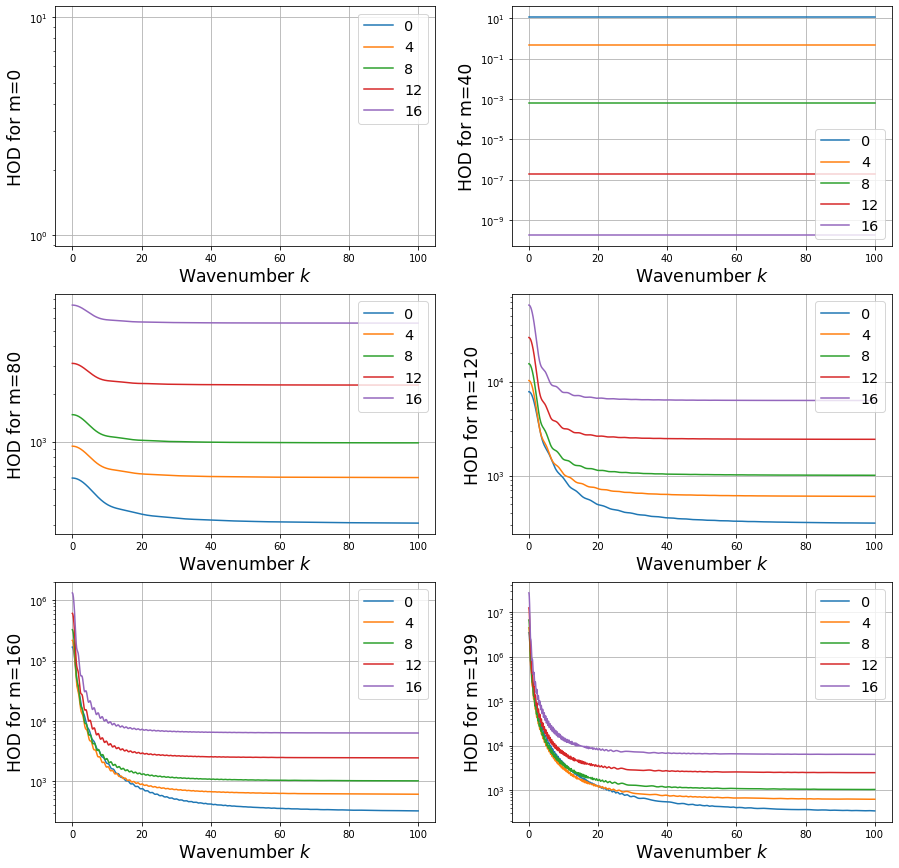

In [83]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))

ax1.grid()
ax1.set_yscale('log')
ax1.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax1.set_ylabel('HOD for m=0', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax1.plot(ks, hcos._get_hod('g')[i, 0], label=str(i))
ax1.legend(fontsize='x-large')

ax2.grid()
ax2.set_yscale('log')
ax2.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax2.set_ylabel('HOD for m=40', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax2.plot(ks, hcos._get_hod('g')[i, 40], label=str(i))
ax2.legend(fontsize='x-large')

ax3.grid()
ax3.set_yscale('log')
ax3.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax3.set_ylabel('HOD for m=80', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax3.plot(ks, hcos._get_hod('g')[i, 80], label=str(i))
ax3.legend(fontsize='x-large')

ax4.grid()
ax4.set_yscale('log')
ax4.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax4.set_ylabel('HOD for m=120', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax4.plot(ks, hcos._get_hod('g')[i, 120], label=str(i))
ax4.legend(fontsize='x-large')

ax5.grid()
ax5.set_yscale('log')
ax5.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax5.set_ylabel('HOD for m=160', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax5.plot(ks, hcos._get_hod('g')[i, 160], label=str(i))
ax5.legend(fontsize='x-large')

ax6.grid()
ax6.set_yscale('log')
ax6.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax6.set_ylabel('HOD for m=199', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax6.plot(ks, hcos._get_hod('g')[i, 199], label=str(i))
ax6.legend(fontsize='x-large')

plt.show()

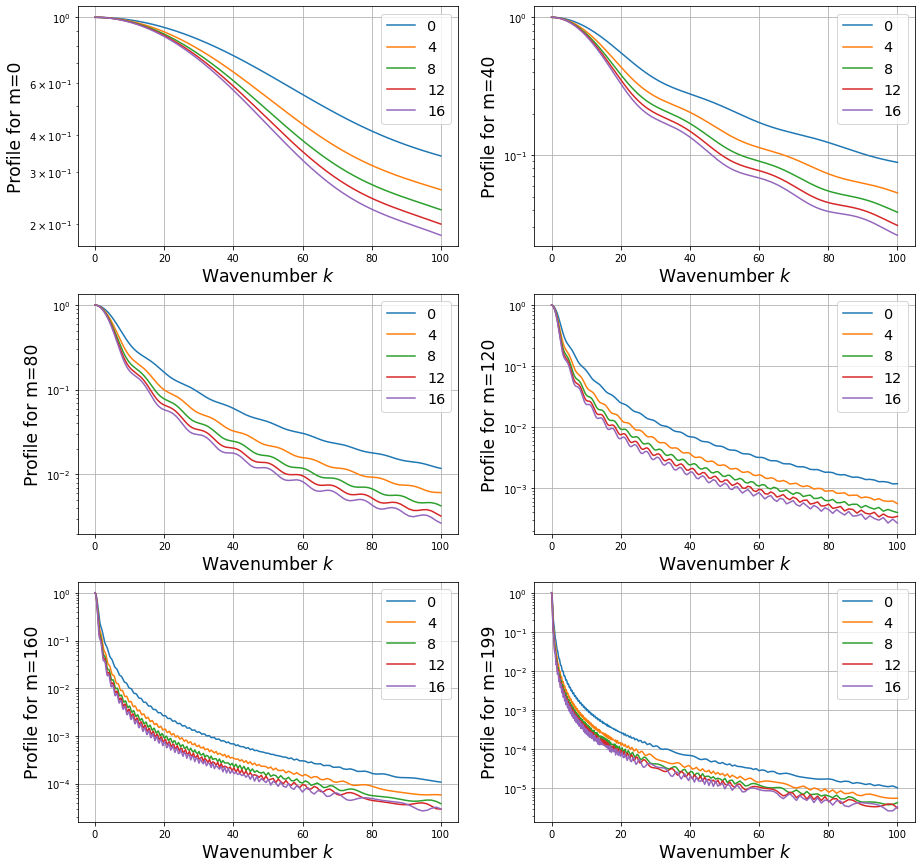

In [85]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))

ax1.grid()
ax1.set_yscale('log')
ax1.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax1.set_ylabel('Profile for m=0', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax1.plot(ks, hcos.uk_profiles['nfw'][i, 0], label=str(i))
ax1.legend(fontsize='x-large')

ax2.grid()
ax2.set_yscale('log')
ax2.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax2.set_ylabel('Profile for m=40', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax2.plot(ks, hcos.uk_profiles['nfw'][i, 40], label=str(i))
ax2.legend(fontsize='x-large')

ax3.grid()
ax3.set_yscale('log')
ax3.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax3.set_ylabel('Profile for m=80', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax3.plot(ks, hcos.uk_profiles['nfw'][i, 80], label=str(i))
ax3.legend(fontsize='x-large')

ax4.grid()
ax4.set_yscale('log')
ax4.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax4.set_ylabel('Profile for m=120', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax4.plot(ks, hcos.uk_profiles['nfw'][i, 120], label=str(i))
ax4.legend(fontsize='x-large')

ax5.grid()
ax5.set_yscale('log')
ax5.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax5.set_ylabel('Profile for m=160', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax5.plot(ks, hcos.uk_profiles['nfw'][i, 160], label=str(i))
ax5.legend(fontsize='x-large')

ax6.grid()
ax6.set_yscale('log')
ax6.set_xlabel('Wavenumber $k$', fontsize='xx-large')
ax6.set_ylabel('Profile for m=199', fontsize='xx-large')
for i in np.arange(0, 20, 4):
    ax6.plot(ks, hcos.uk_profiles['nfw'][i, 199], label=str(i))
ax6.legend(fontsize='x-large')

plt.show()